# MNIST in NumPy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the Dataset

In [2]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [3]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(f'Shape of df_train: {df_train.shape}')
print(f'Shape of df_test: {df_test.shape}')

Shape of df_train: (60000, 785)
Shape of df_test: (10000, 785)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


#### Creating Training and Testing data

In [6]:
X_train, y_train = np.array(df_train.drop(columns=['label']))/255, np.array(df_train['label'])
X_test, y_test = np.array(df_test.drop(columns=['label']))/255, np.array(df_test['label'])

In [7]:
print(f'Shape of X_train: {X_train.shape}\tShape of y_train: {y_train.shape}')
print(f'Shape of X_test:  {X_test.shape}\tShape of y_test:  {y_test.shape}')

Shape of X_train: (60000, 784)	Shape of y_train: (60000,)
Shape of X_test:  (10000, 784)	Shape of y_test:  (10000,)


#### View some numbers

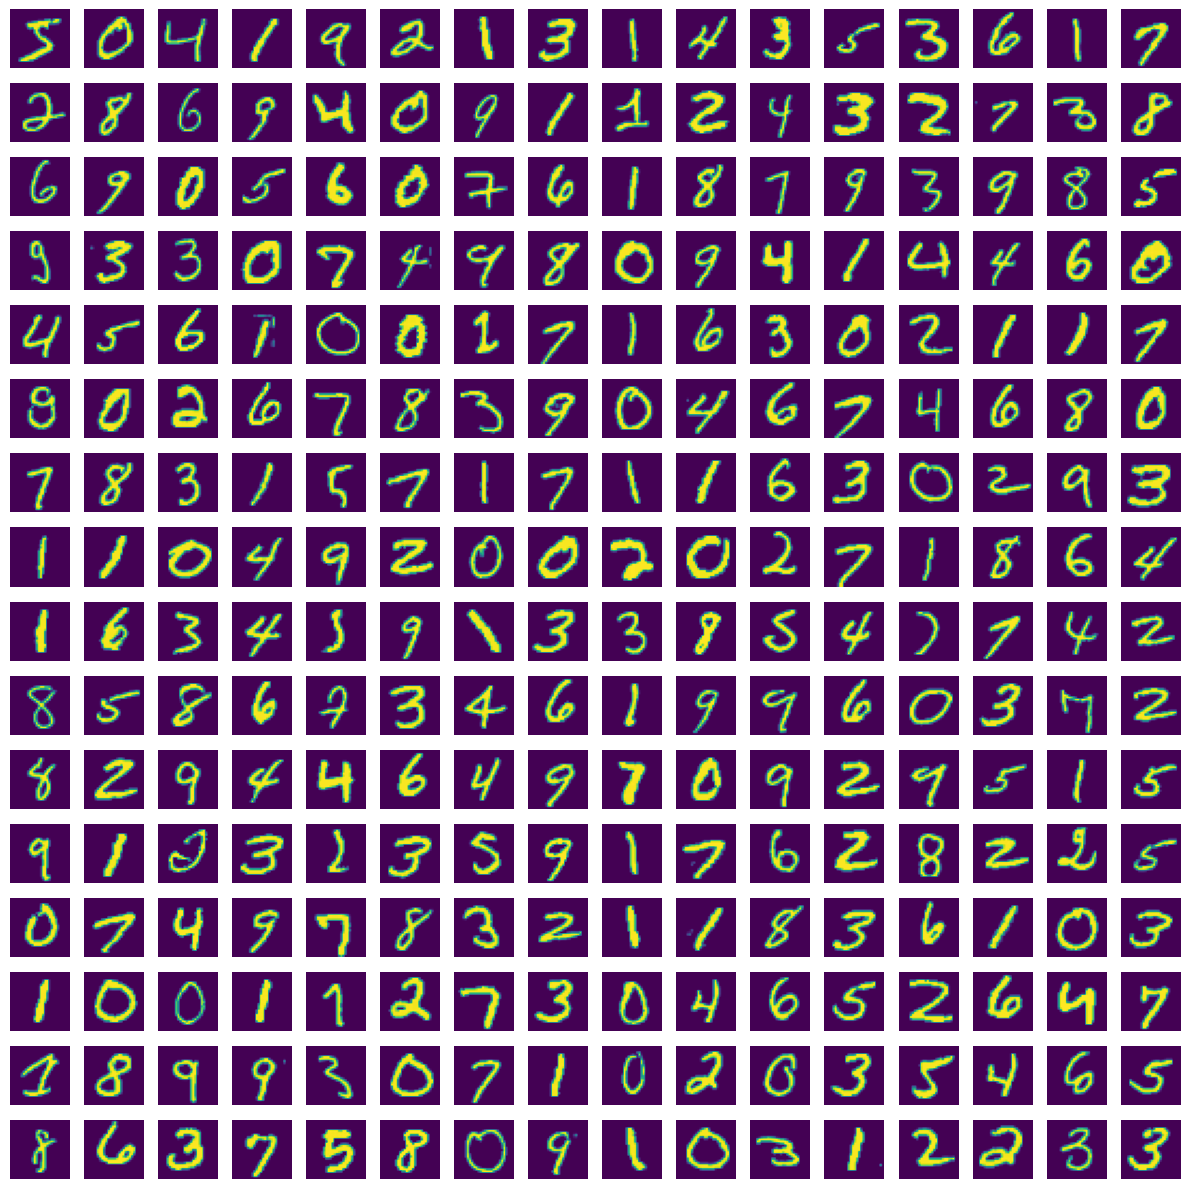

In [8]:
N = 16
fig, axes = plt.subplots(nrows=N, ncols=N, figsize=(12, 12))
for i in range(N**2):
    ax = axes[i // N, i % N]
    ax.imshow(X_train[i].reshape(28, 28))
    ax.axis('off')
plt.tight_layout()
plt.show()

#### Using PyTorch

In [9]:
import torch
from mnist_torch import BobNetTorch

In [10]:
X_train_torch, y_train_torch = torch.Tensor(X_train), torch.Tensor(y_train)
X_test_torch, y_test_torch = torch.Tensor(X_test), torch.Tensor(y_test)
print(f'Shape of X_train: {X_train_torch.shape}')
print(f'Shape of y_train: {y_train_torch.shape}')
print(f'Shape of X_test: {X_test_torch.shape}')
print(f'Shape of y_test: {y_test_torch.shape}')

Shape of X_train: torch.Size([60000, 784])
Shape of y_train: torch.Size([60000])
Shape of X_test: torch.Size([10000, 784])
Shape of y_test: torch.Size([10000])


In [11]:
# Create the neural network, train and predict
bobnet = BobNetTorch(n_in=784, n_hidden=10, n_out=10)
bobnet.fit(X_train_torch, y_train_torch, lr=0.01, epochs=100, batch_size=32)

Epoch: 0	Cross-Entropy: 0.4523	Accuracy: 0.8723
Epoch: 10	Cross-Entropy: 0.1518	Accuracy: 0.9266
Epoch: 20	Cross-Entropy: 0.3325	Accuracy: 0.9350
Epoch: 30	Cross-Entropy: 0.1523	Accuracy: 0.9398
Epoch: 40	Cross-Entropy: 0.0954	Accuracy: 0.9429
Epoch: 50	Cross-Entropy: 0.2030	Accuracy: 0.9458
Epoch: 60	Cross-Entropy: 0.2093	Accuracy: 0.9459
Epoch: 70	Cross-Entropy: 0.1581	Accuracy: 0.9483
Epoch: 80	Cross-Entropy: 0.1884	Accuracy: 0.9496
Epoch: 90	Cross-Entropy: 0.2698	Accuracy: 0.9506


In [13]:
# Calculate accuracy on testing data
y_hat_torch = bobnet.predict(X_test_torch)
accuracy = (y_hat_torch == y_test_torch).float().mean()
print(f'Accuracy on Testing set: {accuracy:.4f}')

Accuracy on Testing set: 0.9403


#### Using NumPy

In [ ]:
from mnist_numpy import BobNet

bobnet = BobNet(n_in=784, n_hidden=10, n_out=10)
bobnet.fit(X_train, y_train, lr=0.0004, epochs=100, batch_size=32)

Epoch: 0	Cross-Entropy: 1.5289	Accuracy: 0.5267
Epoch: 10	Cross-Entropy: nan	Accuracy: 0.0987


KeyboardInterrupt: 

In [50]:
y_hat = bobnet.predict(X_test)
accuracy = (y_test == y_hat).mean()
print(f'Accuracy on Testing set: {accuracy:.4f}')

Accuracy on Testing set: 0.8634
